In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [2]:
import os
os.chdir('/content/drive/MyDrive/TCC/LIGHT_ADAPTATION_DOMIAN/CCT')

In [3]:
# !pip install -r requirements.txt

In [4]:
import os
import json
import argparse
import torch
import math
from torch.utils.data.dataloader import DataLoader


#custom libs
from dataloaders.cityscapes_Dataset import CityscapeDataLoader, CityScape, inv_preprocess, decode_labels
from dataloaders.gta5_Dataset import GTA5_Dataset, GTA5DataLoader
from dataloaders.Brazil_Dataset import Brazil_Dataset, CityscapeBrazilDataLoader
from utils import Logger
from trainer import Trainer
from dataloaders import VOC
from models import CCT
import torch.nn.functional as F
from utils.losses import abCE_loss, CE_loss, consistency_weight, FocalLoss, softmax_helper, get_alpha

In [5]:
class Args:
    def __init__(self, config, resume, device, local):
        self.config = config
        self.resume = resume
        self.device = device
        self.local = local

# Criar uma instância com os valores desejados
args = Args(
    config='/content/drive/MyDrive/TCC/LIGHT_ADAPTATION_DOMIAN/CCT/configs/config_CityScape.json',
    resume=None,
    device=None,
    local=False
)
config = json.load(open(args.config))

In [6]:
 supervised_loader = CityscapeDataLoader(config['train_supervised'])

In [7]:
img, target = supervised_loader.dataset[0]

In [8]:
# prompt: visualizar as imanges e targets das celulas anteriores

import matplotlib.pyplot as plt

# Visualizar a imagem
plt.imshow(inv_preprocess(img).permute(1, 2, 0))  # Permutar as dimensões para (H, W, C)
plt.title("Imagem")
plt.show()

# Visualizar o target
plt.imshow(decode_labels(target).squeeze())  # Remover a dimensão extra e usar mapa de cores em escala de cinza
plt.title("Target")
plt.show()

In [9]:
# Criar uma instância com os valores desejados
args = Args(
    config='/content/drive/MyDrive/TCC/LIGHT_ADAPTATION_DOMIAN/CCT/configs/config_Brazil.json',
    resume=None,
    device=None,
    local=False
)
config = json.load(open(args.config))

In [10]:
supervised_loader = CityscapeBrazilDataLoader(config['train_supervised'])

train: (17188, {0})


In [11]:
import numpy as np
target = np.full(( 10, 10), 255, dtype=np.int8)
target

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=int8)

In [12]:
img, target = supervised_loader.dataset[100]

368 512


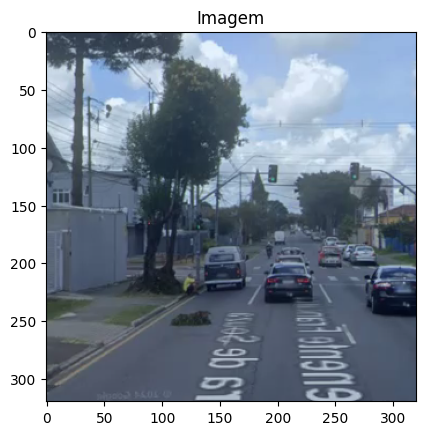

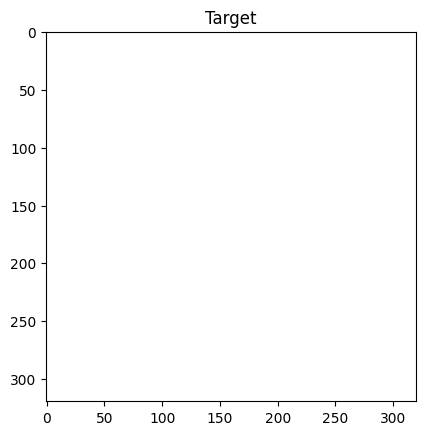

In [13]:
# prompt: visualizar as imanges e targets das celulas anteriores

import matplotlib.pyplot as plt

# Visualizar a imagem
plt.imshow(inv_preprocess(img).permute(1, 2, 0))  # Permutar as dimensões para (H, W, C)
plt.title("Imagem")
plt.show()

# Visualizar o target
plt.imshow(decode_labels(target).squeeze())  # Remover a dimensão extra e usar mapa de cores em escala de cinza
plt.title("Target")
plt.show()

In [14]:
# Criar uma instância com os valores desejados
args = Args(
    config='/content/drive/MyDrive/TCC/LIGHT_ADAPTATION_DOMIAN/CCT/configs/config_GTA5.json',
    resume=None,
    device=None,
    local=False
)
config = json.load(open(args.config))

In [15]:
supervised_loader = GTA5DataLoader(config['train_supervised'])

train: (12403, {12403})


In [16]:
img, target = supervised_loader.dataset[100]

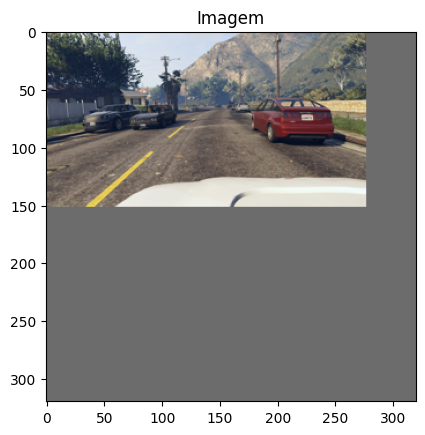

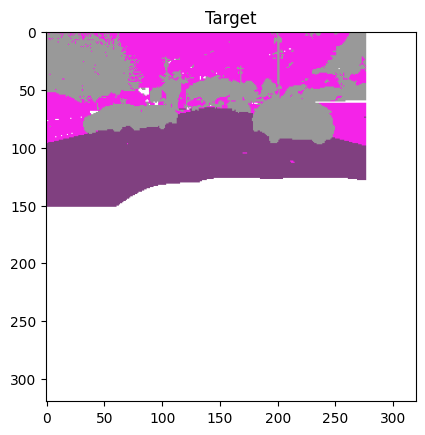

In [17]:
# prompt: visualizar as imanges e targets das celulas anteriores

import matplotlib.pyplot as plt

# Visualizar a imagem
plt.imshow(inv_preprocess(img).permute(1, 2, 0))  # Permutar as dimensões para (H, W, C)
plt.title("Imagem")
plt.show()

# Visualizar o target
plt.imshow(decode_labels(target).squeeze())  # Remover a dimensão extra e usar mapa de cores em escala de cinza
plt.title("Target")
plt.show()